In [1]:
                            #AGENDA
#Purpose of model Evaluation and common evaluation process
#Usage of classification accuracy and its limitations
#How does confusion matrix describe the performance of a classifier
#What metrics can be evaluated using confusion matrix
#Adjust classification performance by changing classification threshold 
#Purpose of ROC curve
#Area under the curve (AUC) differ from classification accuracy

In [2]:
#Model Evaluation Process:

#Training and Testing on the same data
#Train/Test Split
# k-fold validation

#Model Evaluation Metrics
    #Regression Problems: MAE, MSE, RMSE
    #Classification Problem: Classification Accuracy

In [3]:
import pandas as pd

In [4]:
url='https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'
col_names=['pregnant','glucose','bp','skin','insulin','bmi','pedigree','age','label']
pima=pd.read_csv(url, header=None, names=col_names)

In [5]:
pima.shape

(768, 9)

In [6]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
x=pima.ix[:,:'age']
y=pima['label']

In [8]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: label, dtype: int64

In [9]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

logreg=LogisticRegression()
logreg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [12]:
y_pred = logreg.predict(x_test)
print(metrics.accuracy_score(y_test,y_pred))

0.807291666667


In [13]:
y_test.value_counts()

0    130
1     62
Name: label, dtype: int64

In [14]:
# % of ones

y_test.mean()

0.3229166666666667

In [15]:
# % of zeroes

1-y_test.mean()

0.6770833333333333

In [16]:
y_test.value_counts()/len(y_test)

0    0.677083
1    0.322917
Name: label, dtype: float64

In [17]:
#print first 25 true and predicted values

print('True:', y_test.values[0:25])
print('Pred:', y_pred[0:25])

True: [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0]
Pred: [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0]


In [18]:
#Conclusion:
    #Classification Accuracy is the easiest classification metrics to understand
    #Doesn't tell the underlying distribution of response values
    #Doesn't tell what "type of errors" your classifier is making

In [19]:
                        #CONFUSION MATRIX

In [20]:
#Describes the performance of classification model

In [21]:
print(metrics.confusion_matrix(y_test, y_pred))

[[119  11]
 [ 26  36]]


In [22]:
#Basic Terminology
    #True Positive
    #True Negative
    #False Positive
    #False Negative

In [23]:
#Save Confusion Matrix 

confusion=metrics.confusion_matrix(y_test, y_pred)
TP=confusion[1,1]
FP=confusion[0,1]
TN=confusion[0,0]
FN=confusion[1,0]

In [24]:
#Classification Accuracy: How often the classifier is correct

print((TP+TN)/(TP+TN+FP+FN))
print(metrics.accuracy_score(y_test,y_pred))

0.807291666667
0.807291666667


In [25]:
#Classification Error: How often the classifier is incorrect
                    # Also known as Misclassification Error
    
print((FP+FN)/(TP+TN+FP+FN))
print(1 - metrics.accuracy_score(y_test,y_pred))

0.192708333333
0.192708333333


In [26]:
#Sensitivity/ Recall: When the actual value is positive, how often the prediction is correct
            # Also know as "Recall" or "True Positive Rate"
print(TP/float(TP+FN))
print(metrics.recall_score(y_test,y_pred))

0.58064516129
0.58064516129


In [27]:
#Specificity: When the actual value is negative, how often the prediction is correct
           
print(TN/(TN+FP))

0.915384615385


In [28]:
#False Positive Rate: When the true value is negative, how often is the prediction is incorrect

print(FP/(FP+TN))

0.0846153846154


In [29]:
#Precision: When positve value is predicted, how often is the prediction is correct
            #i.e. when I predict positive how often is it true
    
print(TP/(TP+FP))
print(metrics.precision_score(y_test,y_pred))

0.765957446809
0.765957446809


In [30]:
#Conclusion
    #Confusion Matrix gives a more complete picture of how the performance of the classifier
    #Als o allows to compute various classification metrics and these metrics can guide your model selection

In [31]:
#Spam Classifeir: Spam is Positive. False Negative(Spam goes to Ham) are more acceptable than False Positive(Ham goes to Spam)
                #So using Specifity or Precision
#Fraud Detection: Fraud is Positive:
                #Normal Transaction flagged as fraud(False Positive) than False Negative (Fraud flagged as Normal)
                #So using Sensitivity

In [32]:
            #Adjusting Classification Threshold

In [33]:
#Predicting first 10 predicted responses
logreg.predict(x_test)[:10]

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0], dtype=int64)

In [34]:
#Print first 10 predicted probabilities of class members
logreg.predict_proba(x_test)[:10]

array([[ 0.10478412,  0.89521588],
       [ 0.7865292 ,  0.2134708 ],
       [ 0.85902097,  0.14097903],
       [ 0.39703763,  0.60296237],
       [ 0.82785626,  0.17214374],
       [ 0.92375952,  0.07624048],
       [ 0.31033361,  0.68966639],
       [ 0.25141564,  0.74858436],
       [ 0.55814379,  0.44185621],
       [ 0.62403917,  0.37596083]])

In [35]:
#first 10 predicted probabilities of class 1
logreg.predict_proba(x_test)[:10,1]

array([ 0.89521588,  0.2134708 ,  0.14097903,  0.60296237,  0.17214374,
        0.07624048,  0.68966639,  0.74858436,  0.44185621,  0.37596083])

In [36]:
#store 
y_pred_prob=logreg.predict_proba(x_test)[:,1]

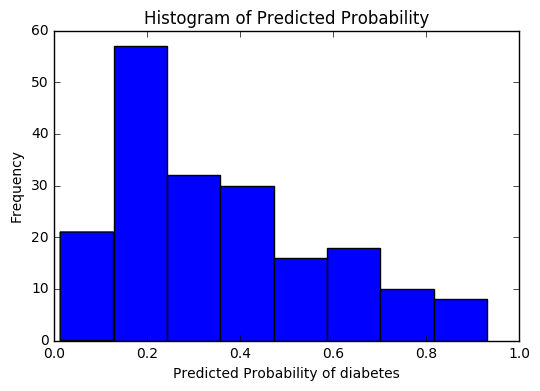

In [38]:
import matplotlib.pyplot as plt
plt.rcParams['font.size']=10

plt.hist(y_pred_prob,bins=8)
plt.xlim(0,1)

plt.title('Histogram of Predicted Probability')
plt.xlabel('Predicted Probability of diabetes')
plt.ylabel('Frequency')

plt.show()

In [39]:
#Currently threshold is 0.5

In [40]:
#Decrease threshold to increase the sensitivity

In [41]:
#Predict diabetes if predicted prob is greater than 0.3
from sklearn.preprocessing import binarize
y_pred_class = binarize(y_pred_prob, 0.3)[0]

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [42]:
y_pred_prob[:10]

array([ 0.89521588,  0.2134708 ,  0.14097903,  0.60296237,  0.17214374,
        0.07624048,  0.68966639,  0.74858436,  0.44185621,  0.37596083])

In [43]:
y_pred_class

array([ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        0.,  0.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,
        0.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,
        1.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,
        1.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,
        1.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,
        0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,
        0.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,
        1.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,
        1.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,  1.,
        1.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,
        0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,
        1.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0

In [44]:
print(confusion)

[[119  11]
 [ 26  36]]


In [45]:
print(metrics.confusion_matrix(y_test,y_pred_class))

[[86 44]
 [ 8 54]]


In [46]:
#print sensitivity
print(54/(54+8))

0.8709677419354839


In [47]:
#print specificity
print(86/(86+44))

0.6615384615384615


In [48]:
        #CONCLUSION
#Threshold prob is 0.5, by default, to convert predicted probabilities into class predictions
#Specificity and Sensitivity are inversily related

In [49]:
#ROC and Area Under the Curve(AUC)

In [205]:
#It would be great if we could see how Specificity and Sensitivity are affected by various thresholds without actually changing 
    #thresholds


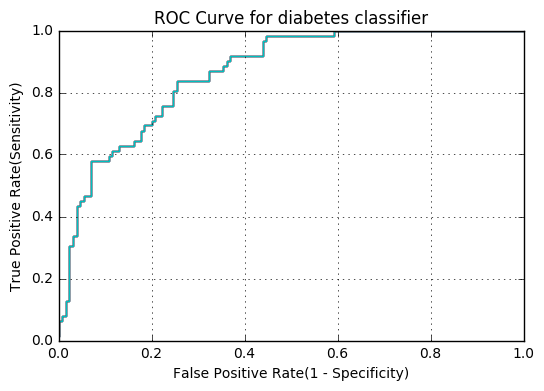

In [54]:
#IMPORTANT:first arg is true value, second arg is pred prob

fpr, tpr, thresholds=metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr,tpr)
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel("False Positive Rate(1 - Specificity)")
plt.ylabel("True Positive Rate(Sensitivity)")
plt.title("ROC Curve for diabetes classifier")
plt.grid(True)
plt.show()

In [55]:
#ROC Curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your 
#particular context
#You can't actually see the thresholds used to generate the curve on the ROC curve itself

In [58]:
#define a function that returns dpecificity and sensitivity for a threshold
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1-fpr[thresholds > threshold][-1])

In [59]:
evaluate_threshold(0.5)

Sensitivity: 0.58064516129
Specificity: 0.930769230769


In [60]:
evaluate_threshold(0.3)

Sensitivity: 0.870967741935
Specificity: 0.676923076923


In [61]:
            #Area Under Curve(AUC)
#AUC is the percentage of the ROC plot underneath the curve

In [62]:
#IMPORTANT:first arg is true value, second arg is pred prob
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.864143920596


In [63]:
#AUC is useful as a single number summary of classifier performance

#If you randomly chose one positive and one negative observation,AUC represents the likelihood that your classifier will assign 
#a higher predicted probability to the positive observation

#AUC is useful even when there is high class imbalance (unlike classification accuracy)

In [65]:
#calculate cross-validation AUC
from sklearn.cross_validation import cross_val_score
logreg=LogisticRegression()
cross_val_score(logreg, x, y, cv=10, scoring='roc_auc').mean()

0.8246837606837607

In [66]:
#CONFUSION MATRIX advantages

#Allows to calculate variety of metrics
#Useful for multi-class problems

In [67]:
#ROC/AUC Advantages:

#Doesnt need to set a classification threshold
#Still useful when there is high class imbalance